In [1]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
import json
from pprint import pprint
# Import the API key.
from config import weather_api_key
import numpy as np
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# create a list for holding the cities.
cities= []

# Identify each city for nearest lat and lng in combination.

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    # if the city is unique then add it to our cities list.
    
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count.
len(cities)




615

In [4]:

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | long xuyen
Processing Record 4 of Set 1 | haines junction
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | abha
Processing Record 8 of Set 1 | vao
Processing Record 9 of Set 1 | sorvag
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | a

In [11]:
len(city_data)

561

In [14]:
import pandas as pd

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,51.75,77,100,6.04,ZA,2022-07-23 01:52:36
1,Long Xuyen,10.3833,105.4167,84.15,73,99,2.95,VN,2022-07-23 01:52:36
2,Haines Junction,60.7522,-137.5108,58.95,44,99,8.05,CA,2022-07-23 01:52:37
3,Ushuaia,-54.8000,-68.3000,35.26,87,75,21.85,AR,2022-07-23 01:51:28
4,Lebu,-37.6167,-73.6500,53.06,95,100,12.95,CL,2022-07-23 01:47:50
5,Abha,18.2164,42.5053,66.02,77,20,4.61,SA,2022-07-23 01:52:37
6,Vao,-22.6667,167.4833,73.87,89,100,26.15,NC,2022-07-23 01:52:38
7,Hobart,-42.8794,147.3294,58.26,71,75,5.75,AU,2022-07-23 01:52:38
8,Atuona,-9.8000,-139.0333,77.58,77,14,15.28,PF,2022-07-23 01:52:38
9,Kapaa,22.0752,-159.3190,84.52,69,0,14.97,US,2022-07-23 01:52:39


In [16]:
# reorder the columns as city,country, date,lat,lng,max temp,humidity, cloudiness, and wind speed, so they are easier to read:

new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2022-07-23 01:52:36,-34.0033,24.7314,51.75,77,100,6.04
1,Long Xuyen,VN,2022-07-23 01:52:36,10.3833,105.4167,84.15,73,99,2.95
2,Haines Junction,CA,2022-07-23 01:52:37,60.7522,-137.5108,58.95,44,99,8.05
3,Ushuaia,AR,2022-07-23 01:51:28,-54.8000,-68.3000,35.26,87,75,21.85
4,Lebu,CL,2022-07-23 01:47:50,-37.6167,-73.6500,53.06,95,100,12.95
...,...,...,...,...,...,...,...,...,...
556,Matagami,CA,2022-07-23 02:07:35,49.7502,-77.6328,66.31,72,75,12.66
557,Fershampenuaz,RU,2022-07-23 02:07:36,53.5202,59.8117,61.43,72,3,2.42
558,Busayra,JO,2022-07-23 02:07:36,30.7376,35.6078,65.26,62,0,3.18
559,San Andres,CO,2022-07-23 02:07:36,12.5847,-81.7006,82.42,83,75,8.05


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# # Get today's date in seconds.
# today = time.strftime("%x")
# today

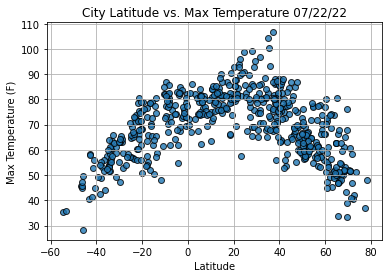

In [26]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

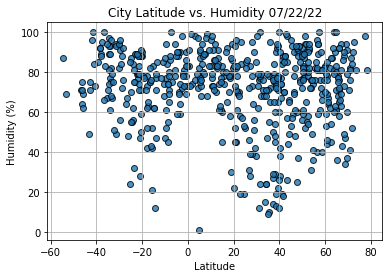

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

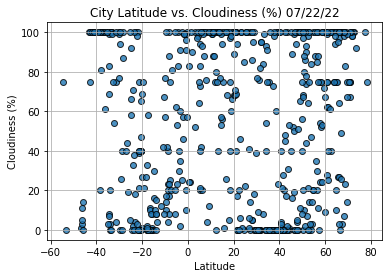

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

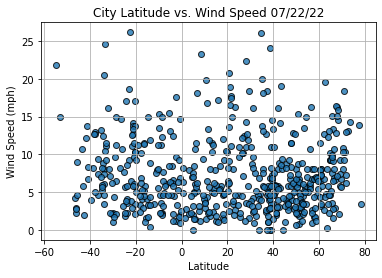

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()